In [2]:
import numpy as np #Нужные библиотеки
import matplotlib.pyplot as plt

In [3]:
def least_squares(x_arr, y_arr): #Подпрограмма МНК для прямой
    size= x_arr.shape[0]
    b=(np.sum(y_arr)*np.sum(x_arr**2)-np.sum(x_arr)*np.sum(x_arr*y_arr))/(size*np.sum(x_arr**2)-np.sum(x_arr)**2)
    a=(np.sum(y_arr)-size*b)/np.sum(x_arr)
    return a, b

In [38]:
N=[] #Массив из чисел от 100 до 1000000
i=1
while i<=100:
    N.append(i)
    i=i+1
N=np.array(N)
N=10000*N
print("First stage has ended")

with open('sf.txt', 'r') as file: #Парсинг sf
    lines=file.readlines()
sf_data_worst=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('bf.txt', 'r') as file: #Парсинг bf
    lines=file.readlines()
bf_data_worst=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

First stage has ended
Second stage has ended
Third stage has ended


In [39]:
print(np.min(sf_data_worst))
print(np.max(sf_data_worst))
print(np.min(bf_data_worst))
print(np.max(bf_data_worst))

66193
3020792
322
627


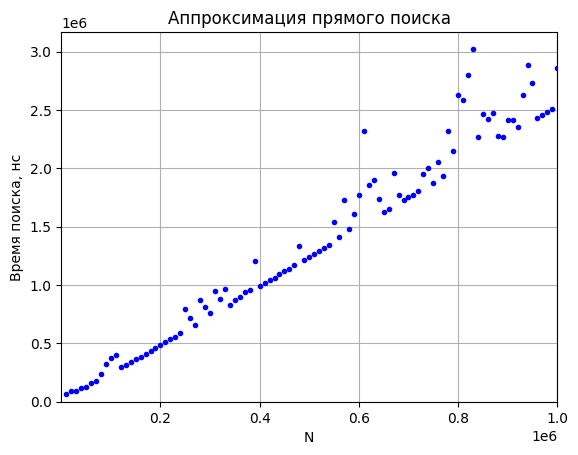

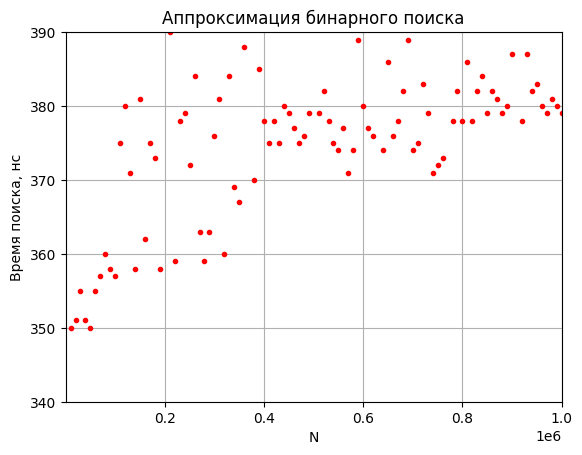

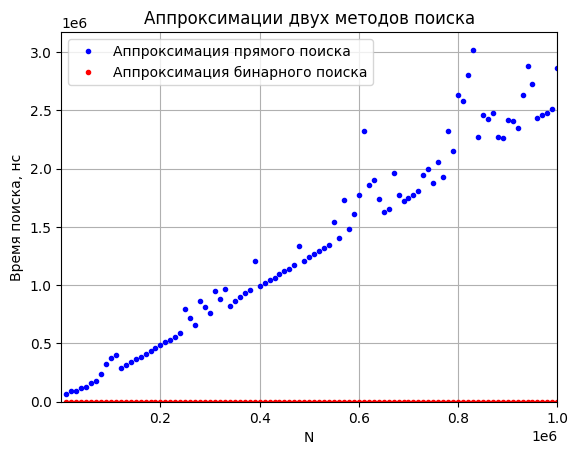

In [40]:
fig, str_worst = plt.subplots()
fig, bin_worst = plt.subplots()
fig, str_and_bin_worst = plt.subplots()

str_worst.plot(N, sf_data_worst, '.', color='b', label="Аппроксимация прямого поиска")
str_worst.grid()

bin_worst.plot(N, bf_data_worst, '.', color='r', label="Аппроксимация бинарного поиска")
bin_worst.grid()

str_and_bin_worst.plot(N, sf_data_worst, '.', color='b', label="Аппроксимация прямого поиска")
str_and_bin_worst.plot(N, bf_data_worst, '.', color='r', label="Аппроксимация бинарного поиска")
str_and_bin_worst.grid()

str_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Аппроксимация прямого поиска', ylim=(0), xlim=(100, 1000000)) #С помощью пределов выкинем точки, которые плохо ложатся рядом с остальными
bin_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Аппроксимация бинарного поиска', ylim=(340, 390), xlim=(100, 1000000))
str_and_bin_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Аппроксимации двух методов поиска', ylim=(0), xlim=(100, 1000000))
str_and_bin_worst.legend()

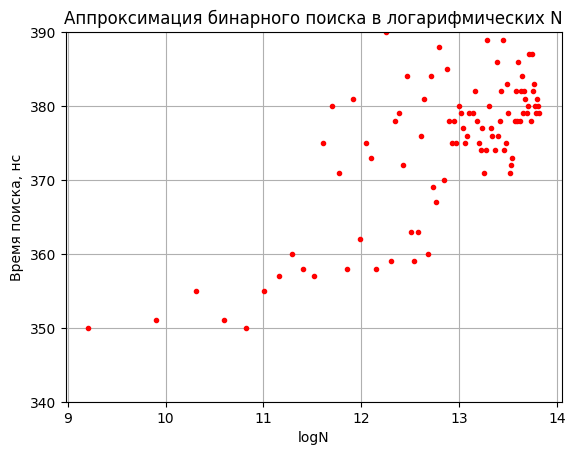

In [41]:
#Проверим логарифмичность
fig, bin_worst_logcheck = plt.subplots()
bin_worst_logcheck.plot(np.log(N), bf_data_worst, '.', color='r')
bin_worst_logcheck.set(xlabel='logN', ylabel='Время поиска, нс', title='Аппроксимация бинарного поиска в логарифмических N', ylim=(340, 390))
bin_worst_logcheck.grid()

Для прямого поиска нетрудно заметить нижнюю прямую, ограничивающую минимальное время поиска элемента, которого нет в массиве, а для бинарного поиска прямая менее незаметна. Минимальное время поиска кажется постоянным, потому что оно очень медленно растёт.
Кроме того, много точек выбиваются из общей картины (в прямом поиске есть даже точка с отрицательным значением времени, её происхождение неизвестно), значит эксперимент имеет невысокую точность.
Проведём аналогичные измерения для поиска случайных чисел.

In [42]:
with open('sfr.txt', 'r') as file: #Парсинг sfr
    lines=file.readlines()
sf_data_random=np.array([int(line.strip()) for line in lines])
print("First stage has ended")

with open('bfr.txt', 'r') as file: #Парсинг bfr
    lines=file.readlines()
bf_data_random=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

First stage has ended
Second stage has ended


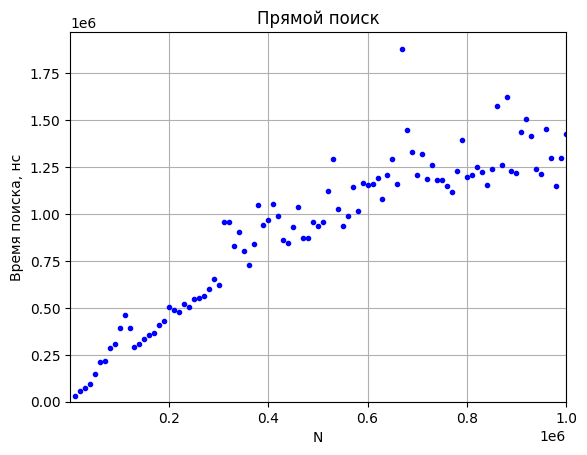

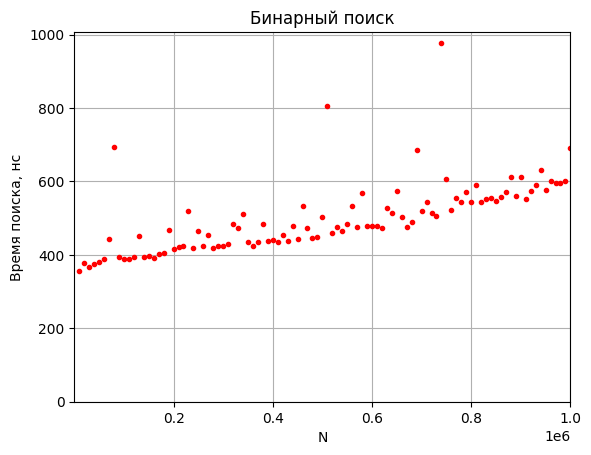

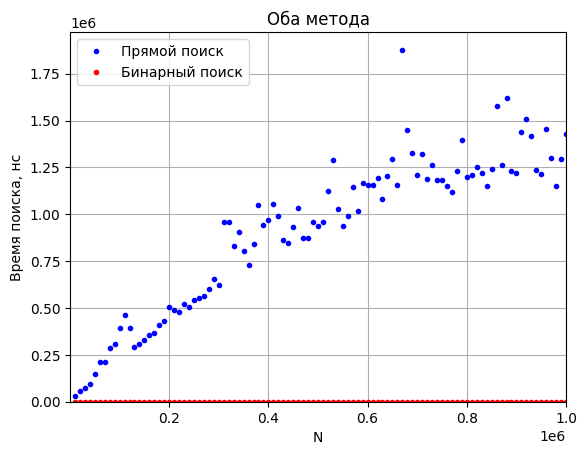

In [43]:
fig, str_random = plt.subplots()
fig, bin_random = plt.subplots()
fig, str_and_bin_random = plt.subplots()

str_random.plot(N, sf_data_random, '.', color='b', label="Прямой поиск")
str_random.grid()

bin_random.plot(N, bf_data_random, '.', color='r', label="Бинарный поиск")
bin_random.grid()

str_and_bin_random.plot(N, sf_data_random, '.', color='b', label="Прямой поиск")
str_and_bin_random.plot(N, bf_data_random, '.', color='r', label="Бинарный поиск")
str_and_bin_random.grid()

str_random.set(xlabel='N', ylabel='Время поиска, нс', title='Прямой поиск', ylim=(0) , xlim=(100, 1000000)) #С помощью пределов выкинем точки, которые плохо ложатся рядом с остальными
bin_random.set(xlabel='N', ylabel='Время поиска, нс', title='Бинарный поиск', ylim=(0), xlim=(100, 1000000))
str_and_bin_random.set(xlabel='N', ylabel='Время поиска, нс', title='Оба метода', ylim=(0), xlim=(100, 1000000))
str_and_bin_random.legend()

По графикам видно, что бинарный поиск намного эффективнее прямого.

Построим графики для суммы двух.

In [44]:
with open('ssfr.txt', 'r') as file: #Парсинг ssft
    lines=file.readlines()
ss_data_random=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('epfr.txt', 'r') as file: #Парсинг epfr
    lines=file.readlines()
ep_data_random=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

Second stage has ended
Third stage has ended


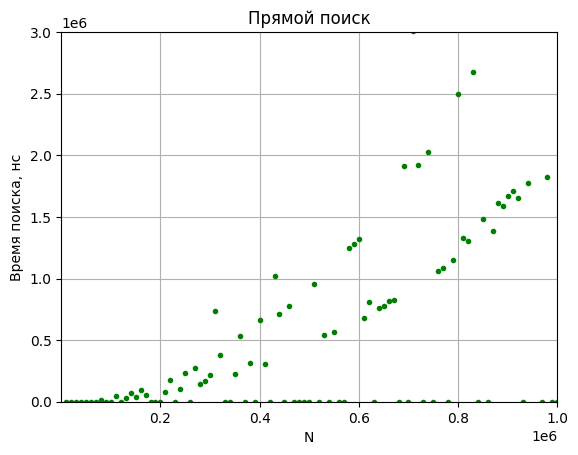

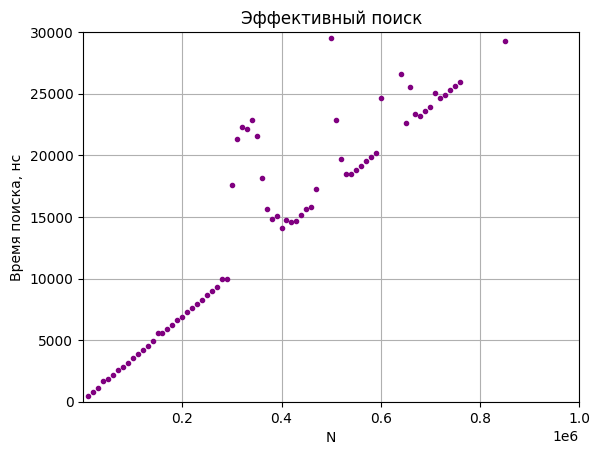

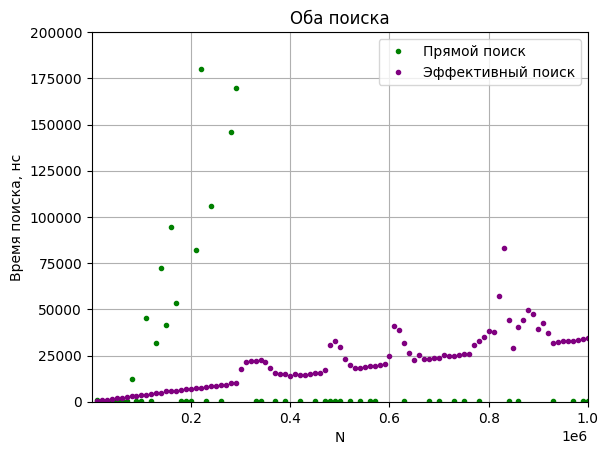

In [45]:
fig, s_random = plt.subplots()
fig, e_random = plt.subplots()
fig, s_and_e_random = plt.subplots()

s_random.plot(N, ss_data_random, '.', color='green', label="Прямой поиск")
s_random.grid()

e_random.plot(N, ep_data_random, '.', color='purple', label="Эффективный поиск")
e_random.grid()

s_and_e_random.plot(N, ss_data_random, '.', color='green', label="Прямой поиск")
s_and_e_random.plot(N, ep_data_random, '.', color='purple', label="Эффективный поиск")
s_and_e_random.grid()

s_random.set(xlabel='N', ylabel='Время поиска, нс', title='Прямой поиск', xlim=(100, 1000000),  ylim=(0, 3*10**6)) #С помощью пределов выкинем точки, которые плохо ложатся рядом с остальными
e_random.set(xlabel='N', ylabel='Время поиска, нс', title='Эффективный поиск', xlim=(100, 1000000), ylim=(0, 30000))
s_and_e_random.set(xlabel='N', ylabel='Время поиска, нс', title='Оба поиска', xlim=(100, 1000000), ylim=(0, 200000))
s_and_e_random.legend()

[Text(0.5, 0, 'N'),
 Text(0, 0.5, 'Корень из времени поиска, нс^1/2'),
 Text(0.5, 1.0, 'Прямой поиск'),
 (100.0, 1000000.0),
 (0.0, 2472.4174612030097)]

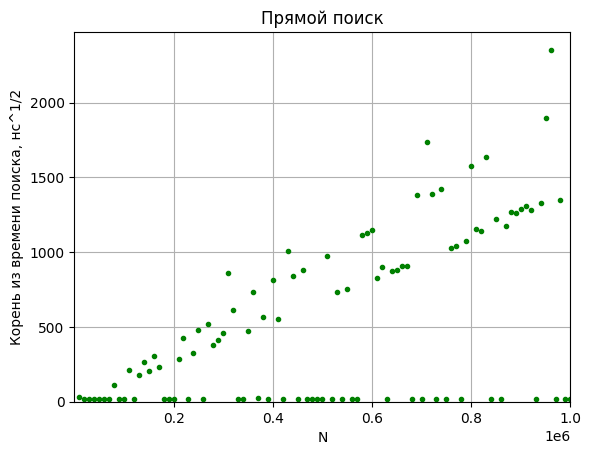

In [60]:
fig, s_random_qua = plt.subplots()
s_random_qua.plot(N, np.sqrt(ss_data_random), '.', color='green', label="Прямой поиск")
s_random_qua.grid()
s_random_qua.set(xlabel='N', ylabel='Корень из времени поиска, нс^1/2', title='Прямой поиск', xlim=(100, 1000000),  ylim=(0))

Действительно, прямой поиск имеет квадратичную асимптотическую сложность от N, а эффективный поиск линейную.
Однако есть огромное множество точек, которые нашлись очень быстро.
Проведём оценку худшей ситуации.

In [61]:
N=[] #Массив из чисел от 100 до 1000000
i=1
while i<=100:
    N.append(i)
    i=i+1
N=np.array(N)
N=100*N

with open('ssfw.txt', 'r') as file: #Парсинг ssfw
    lines=file.readlines()
ss_data_worst=np.array([int(line.strip()) for line in lines])
print("First stage has ended")

with open('epfw.txt', 'r') as file: #Парсинг epfw
    lines=file.readlines()
ep_data_worst=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

First stage has ended
Second stage has ended


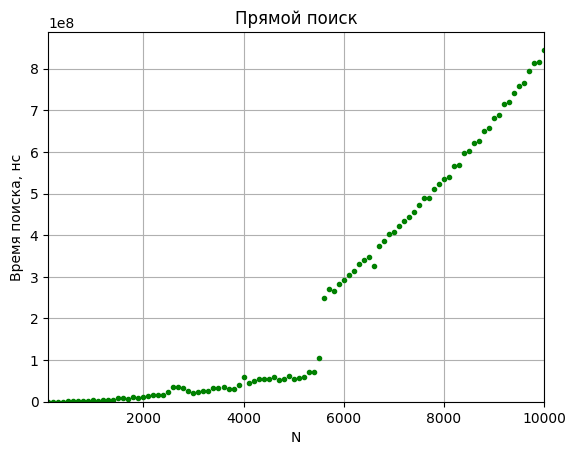

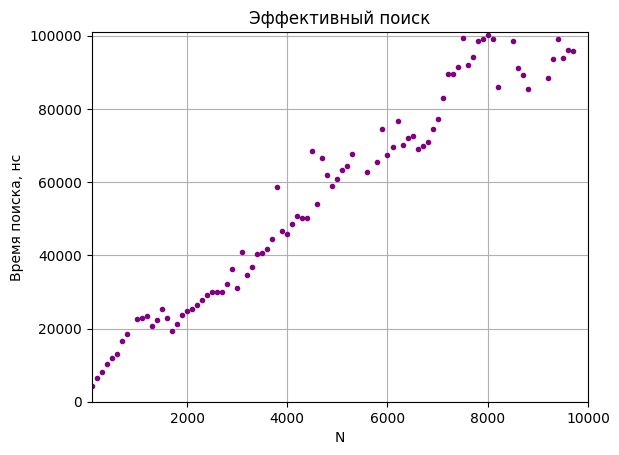

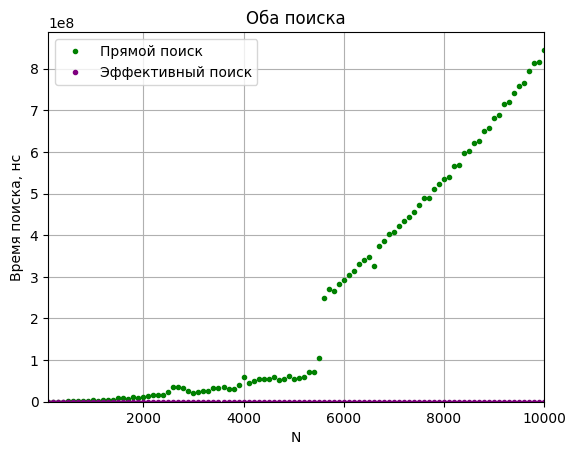

In [66]:
fig, s_worst = plt.subplots()
fig, e_worst = plt.subplots()
fig, s_and_e_worst = plt.subplots()

s_worst.plot(N, ss_data_worst, '.', color='green', label="Прямой поиск")
s_worst.grid()

e_worst.plot(N, ep_data_worst, '.', color='purple', label="Эффективный поиск")
e_worst.grid()

s_and_e_worst.plot(N, ss_data_worst, '.', color='green', label="Прямой поиск")
s_and_e_worst.plot(N, ep_data_worst, '.', color='purple', label="Эффективный поиск")
s_and_e_worst.grid()

s_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Прямой поиск', xlim=(100, 10000), ylim=(0)) #С помощью пределов выкинем точки, которые плохо ложатся рядом с остальными
e_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Эффективный поиск', xlim=(100, 10000), ylim=(0, 101000))
s_and_e_worst.set(xlabel='N', ylabel='Время поиска, нс', title='Оба поиска', xlim=(100, 10000), ylim=(0))
s_and_e_worst.legend()

[Text(0.5, 0, 'N^2'),
 Text(0, 0.5, 'Время поиска, нс'),
 Text(0.5, 1.0, 'Прямой поиск'),
 (10000.0, 104999500.0),
 (0.0, 887635562.5)]

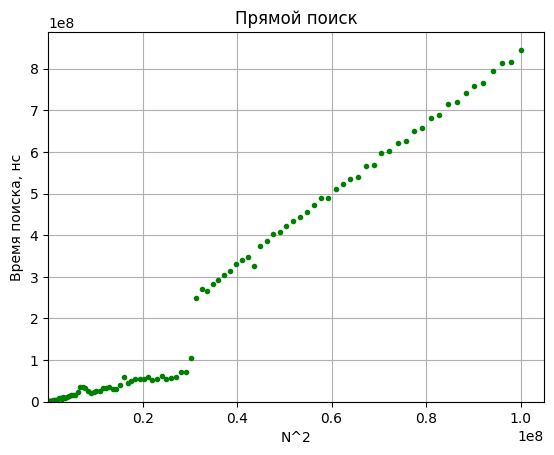

In [68]:
fig, s_worst_qua = plt.subplots()
s_worst_qua.plot(N**2, ss_data_worst, '.', color='green', label="Прямой поиск")
s_worst_qua.grid()
s_worst_qua.set(xlabel='N^2', ylabel='Время поиска, нс', title='Прямой поиск', xlim=(10000), ylim=(0))

График худшего случая более наглядный.

Для проверки скоростей стратегий будем пользоваться прямым поиском, потому что суть стратегии в перемещении частого элемента на первое место, что хорошо для прямого поиска, но плохо для бинарного.

In [78]:
N=[] #Массив из чисел от 100 до 100000
i=0
while i<100:
    N.append(i+1)
    i=i+1
N=np.array(N)
N=N*100
print("First stage has ended")

with open('srtA1.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strA1=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('srtA2.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strA2=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

with open('srtB1.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strB1=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('srtB2.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strB2=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

with open('srtC1.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strC1=np.array([int(line.strip()) for line in lines])
print("Second stage has ended")

with open('srtC2.txt', 'r') as file: #Парсинг
    lines=file.readlines()
strC2=np.array([int(line.strip()) for line in lines])
print("Third stage has ended")

First stage has ended
Second stage has ended
Third stage has ended
Second stage has ended
Third stage has ended
Second stage has ended
Third stage has ended


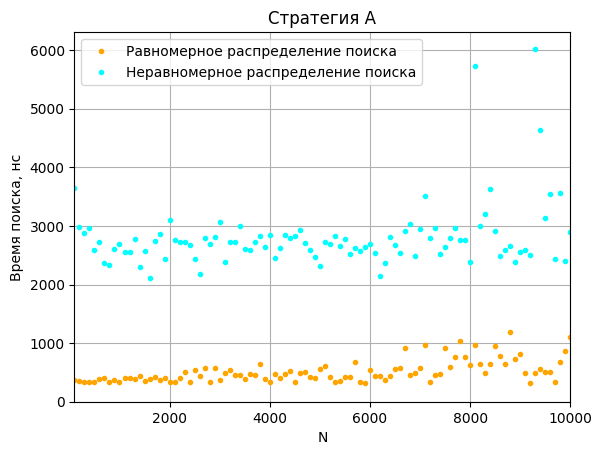

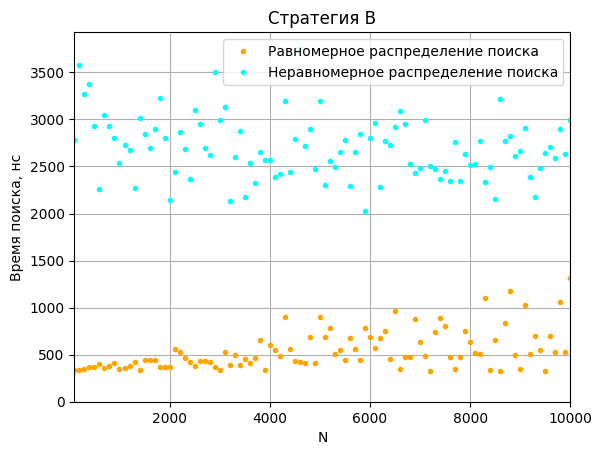

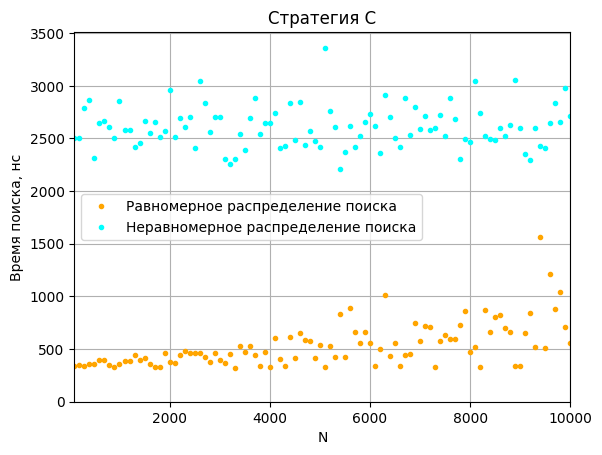

In [79]:
fig, A = plt.subplots()
fig, B = plt.subplots()
fig, C = plt.subplots()
#fig, ABC = plt.subplots()

A.plot(N, strA1, '.', color='orange', label="Равномерное распределение поиска")
A.plot(N, strA2, '.', color='cyan', label="Неравномерное распределение поиска")
A.set(xlabel='N', ylabel='Время поиска, нс', title='Стратегия A', xlim=(100, 10000), ylim=(0))
A.legend()
A.grid()

B.plot(N, strB1, '.', color='orange', label="Равномерное распределение поиска")
B.plot(N, strB2, '.', color='cyan', label="Неравномерное распределение поиска")
B.set(xlabel='N', ylabel='Время поиска, нс', title='Стратегия B', xlim=(100, 10000), ylim=(0))
B.legend()
B.grid()

C.plot(N, strC1, '.', color='orange', label="Равномерное распределение поиска")
C.plot(N, strC2, '.', color='cyan', label="Неравномерное распределение поиска")
C.set(xlabel='N', ylabel='Время поиска, нс', title='Стратегия C', xlim=(100, 10000), ylim=(0))
C.legend()
C.grid()

Все стратегии работают лучше при неравномерном распределении искомых величин.

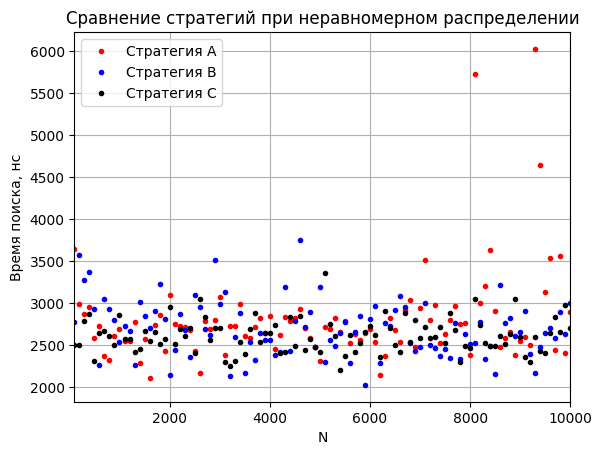

In [84]:
fig, ABC = plt.subplots()
ABC.plot(N, strA2, '.', color='red', label="Стратегия A")
ABC.plot(N, strB2, '.', color='blue', label="Стратегия B")
ABC.plot(N, strC2, '.', color='black', label="Стратегия C")
ABC.set(xlabel='N', ylabel='Время поиска, нс', title='Сравнение стратегий при неравномерном распределении', xlim=(100, 10000))
ABC.legend()
ABC.grid()

График не очень информативный, найдём среднее время поиска для всех стратегий.

In [85]:
print("Стратегия A: "+str(np.mean(strA2)))
print("Стратегия B: "+str(np.mean(strB2)))
print("Стратегия C: "+str(np.mean(strC2)))

Стратегия A: 2804.59
Стратегия B: 2695.89
Стратегия C: 2610.43


В данном (нормальном) распределении самой выгодной оказалась стратегия C, а стратегия A самой невыгодной.